A simple notebook to start modelling in [Essence](https://link.springer.com/article/10.1007/s10601-008-9047-y) right away

By Christopher Stone, University of St Andrews - AIRG

---



# Installation and Setup

In [14]:
!wget https://github.com/conjure-cp/conjure/releases/download/v2.4.0/conjure-v2.4.0-linux-with-solvers.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import zipfile

with zipfile.ZipFile('/content/conjure-v2.4.0-linux-with-solvers.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
cd /content/conjure-v2.4.0-linux-with-solvers

/content/conjure-v2.4.0-linux-with-solvers


In [ ]:
# Add conjure to the PATH environment variable
path = %env PATH
%env PATH=/content/conjure-v2.4.0-linux-with-solvers:$path

# Set the conjure environment variable
%env conjure=/content/conjure-v2.4.0-linux-with-solvers

env: PATH=/content/conjure-v2.4.0-linux-with-solvers:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
env: conjure=/content/conjure-v2.4.0-linux-with-solvers


In [ ]:
!chmod 700 conjure
!chmod 700 savilerow
!chmod 700 minion

In [ ]:
!echo $env

# Model

Integer Sequence to Essence Relation

In [10]:
%%writefile example0.essence
letting n_vertices be 12
letting seq be [1,2,3,4]
letting sequenceLength be 4
letting repetitions be 12
letting vertices be domain int(0..n_vertices)
letting indicess be domain int(0..sequenceLength*repetitions)

find edges : relation of (vertices * vertices)
  such that
    forAll i : indicess .
      exists vertice : vertices . edges(i%n_vertices, ((i%n_vertices)+seq[1+(i%sequenceLength)])%n_vertices)


Writing example0.essence


In [11]:
def IntSequenceToEssenceGraph(vertices,sequence,repetitions):
    graphModel = ""
    graphModel += f'letting n_vertices be {vertices}\n'
    graphModel += f'letting seq be {sequence}\n'
    graphModel += f'letting sequenceLength be {len(sequence)}\n'
    graphModel += f'letting repetitions be {repetitions}\n'
    graphModel += r'''letting vertices be domain int(0..n_vertices)
letting indicess be domain int(0..sequenceLength*repetitions)

find edges : relation of (vertices * vertices)
  such that
    forAll i : indicess .
      exists vertice : vertices . edges(i%n_vertices, ((i%n_vertices)+seq[1+(i%sequenceLength)])%n_vertices)'''
    graphModelFile = "LCFSgraph.essence"
    with open(graphModelFile, 'w') as f:
        f.write(graphModel)
    
    

In [12]:
IntSequenceToEssenceGraph(3,[2,1],2)

In [ ]:
%%writefile example0.essence
letting n_vertices be 6
letting seq be [1,2,3,4]
letting sequenceLength be 4
letting repetitions be 3
letting vertices be domain int(0..n_vertices)
letting indicess be domain int(0..sequenceLength*repetitions)

find val : int(0..10)
such that
  val = seq[0]

Overwriting example0.essence


In [ ]:
%%writefile example0.essence
letting n_vertices be 4
letting seq be [1,1,1,1]
letting sequenceLength be 4
letting repetitions be 1
letting vertices be domain int(0..n_vertices)
letting indicess be domain int(0..sequenceLength*repetitions)

find val : int(0..99)
such that
  val = max(indicess)

Overwriting example0.essence


## Solve

In [13]:
!conjure solve LCFSgraph.essence

'conjure' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Use this option to potentially get a different solution after each run
!conjure solve example0.essence --solver-options=-randomiseorder

Using cached models.
Savile Row: model000001.eprime
Running minion for domain filtering.
Running solver: minion
Copying solution to: example0.solution


## Read solution

In [ ]:
with open('/content/conjure-v2.4.0-linux-with-solvers/conjure-output/model000001-solution000001.solution') as f:
  print(f.read())

language Essence 1.3

letting val be 6



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

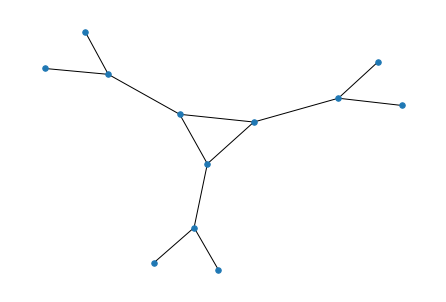

In [ ]:
G = nx.Graph()
with open('/content/conjure-v2.4.0-linux-with-solvers/conjure-output/model000001-solution000001.solution') as f:


  for ln in f:
    if ln.startswith("$"):
      lineTokens = ln.split(" ")
      skip = False
      while  '' in lineTokens:
        lineTokens.remove('')
      for i, token in enumerate(lineTokens):
        if(token == 'Visualisation'):
          skip = True
        if(token.endswith('\n')):
          lineTokens[i] = token[:-1]
      if(not skip):
        G.add_edge(int(lineTokens[1]), int(lineTokens[2]))

nx.draw(G, nx.spring_layout(G,iterations = 1350), node_size=30)

# Parametrised Model

In [ ]:
%%writefile LCFSencoder.essence
given n_vertices : int(1..)
letting vertices be domain int(0..n_vertices)
given sequenceLength : int(0..)
given repetitions : int(0..)
letting indicess be domain int(0..sequenceLength*repetitions)
given seq : matrix indexed by [int(1..sequenceLength)] of int(0..n_vertices)


find edges : relation (size sequenceLength*repetitions) of (vertices * vertices)
  such that
    forAll i : indicess .
      exists vertice : vertices . edges(i%n_vertices, ((i%n_vertices)+seq[1+(i%sequenceLength)])%n_vertices)


Overwriting LCFSencoder.essence


In [ ]:
%%writefile code1.param
letting n_vertices be 12
letting seq be [1,2,3]
letting sequenceLength be 3
letting repetitions be 12

Overwriting code1.param


In [ ]:
!conjure solve LCFSencoder.essence code1.param
#--solver-options=-randomiseorder


Generating models for LCFSencoder.essence
Generated models: model000001.eprime
Saved under: conjure-output
Savile Row: model000001.eprime code1.param
Running minion for domain filtering.
Running solver: minion
Copying solution to: LCFSencoder-code1.solution


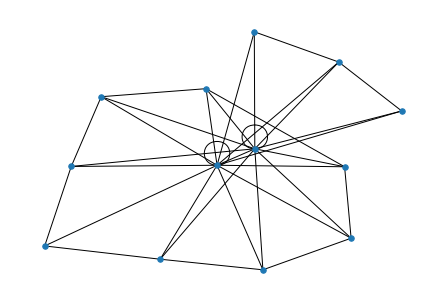

In [ ]:
G = nx.Graph()
with open('/content/conjure-v2.4.0-linux-with-solvers/LCFSencoder-code1.solution') as f:


  for ln in f:
    if ln.startswith("$"):
      lineTokens = ln.split(" ")
      skip = False
      while  '' in lineTokens:
        lineTokens.remove('')
      for i, token in enumerate(lineTokens):
        if(token == 'Visualisation'):
          skip = True
        if(token.endswith('\n')):
          lineTokens[i] = token[:-1]
      if(not skip):
        G.add_edge(int(lineTokens[1]), int(lineTokens[2]))

nx.draw(G, nx.spring_layout(G,iterations = 1350), node_size=30)

# Useful Links
[Essence Documentation](https://conjure.readthedocs.io/en/latest/essence.html)

[Essence Catalog](https://github.com/conjure-cp/EssenceCatalog)
